In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import newton

from utils import *

from ipywidgets import interact

### create inverse problem

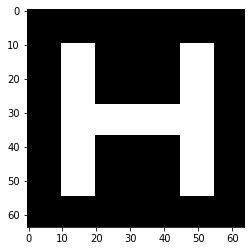

In [2]:
spread = [10,10]
size = 64
shape = (size, size)
pixels = shape[0] * shape[1]

x_true = build_x_true().reshape(-1,1)

plt.imshow(im(x_true, shape), cmap='Greys_r')

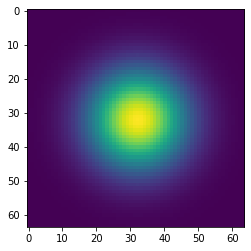

In [3]:
A = build_A(spread, shape)
plt.imshow(im(A[:, int(shape[0]**2/2 + shape[1]/2)], (size, size)))

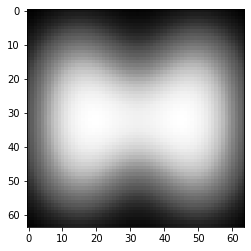

In [5]:
b_true = A @ x_true
plt.imshow(im(b_true, shape), cmap='Greys_r')

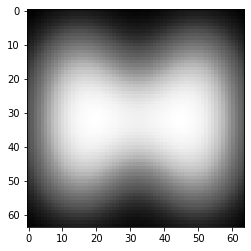

In [6]:
noise_level = 0.001
noise = np.random.randn(pixels)
e = noise_level * np.linalg.norm(b_true) / np.linalg.norm(noise) * noise
e = e.reshape(-1,1)
b = b_true + e

plt.imshow(im(b, shape), cmap='Greys_r')

### naive solution

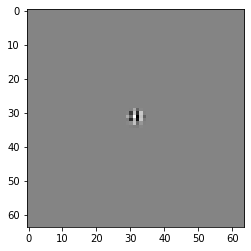

In [7]:
reconstruct = np.linalg.solve(A, b)

plt.imshow(im(reconstruct, shape), cmap='Greys_r')

### solve with truncated svd

In [8]:
U, S, VT = np.linalg.svd(A)
V = VT.T

In [9]:
def trunc_svd(x):
    r = x
    S_hat = S[0:r] #extract the first r singular values
    S_hat_mat = np.diag(S_hat) #form a diagonal matrix
    U_temp = U[:, 0:r]
    x_trunc = np.transpose(VT[0:r, :])@np.linalg.inv(S_hat_mat)@np.transpose(U_temp)@b

    plt.imshow(im(x_trunc, shape), cmap='Greys_r')

interact(trunc_svd, x=(1,200,1))

interactive(children=(IntSlider(value=100, description='x', max=200, min=1), Output()), _dom_classes=('widget-…

<function __main__.trunc_svd(x)>

### GKS